## Import Libraries
Loading all libraries to be used

In [117]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


## Web Crawling
Build Data Set from Internet

In [118]:
categories = ['Technology', 'Sports', 'World', 'Business', 'Politics', 'Entertainment', 'Science', 'Travel', 'Fashion', 'Education']

title = []
category = []
content = []

for categoryIndex in categories:
    for i in range(1, 101):
        # example
        # https://inshorts.com/api/en/search/trending_topics/business?page=4&type=NEWS_CATEGORY
        url = f'https://inshorts.com/api/en/search/trending_topics/{categoryIndex.lower()}?page={i}&type=NEWS_CATEGORY'
        response = requests.get(url)
        data = json.loads(response.text)

        for news in data['data']['news_list']:
            if 'news_obj' in news:
                title.append(news['news_obj']['title'])
                category.append(categoryIndex)
                #category.append(news['news_obj']['category_names'])
                content.append(news['news_obj']['content'])

news_df = pd.DataFrame({'title': title, 'category': category, 'content': content})

In [119]:
# title = []
# category = []
# content = []

# with open('bloomberg_quint_news.json', 'r') as file:
#     data = json.load(file)
#     for item in data:
#         title.append(item['title'])
#         category.append(item['category'])
#         content.append(item['short_description'])
                        
# df2 = pd.DataFrame({'title': title, 'content': content, 'category': category})
# df2 = df2[(df2['category'] == 'Technology')]
# df2 = df2.reset_index(drop=True)
# print(len(df2))

# news_df = pd.concat([df1, df2], ignore_index=True)

In [120]:
# print df
print("Data Frame Printout")
print(len(news_df))
print(news_df.category.value_counts())
print(news_df.head(5), "\n")

# to csv
news_df.to_csv('news.csv')

Data Frame Printout
9864
category
World            997
Business         997
Sports           996
Technology       994
Education        994
Science          992
Entertainment    991
Politics         989
Travel           957
Fashion          957
Name: count, dtype: int64
                                               title    category  \
0  World’s first electric hydrofoiling passenger ...  Technology   
1  World-first system to monitor ‘seafood basket’...  Technology   
2  Tesla unveils its next-gen humanoid robot with...  Technology   
3  Meta used pirated books for AI training despit...  Technology   
4          WhatsApp allows pinning messages in chats  Technology   

                                             content  
0  Candela has completed successful test flights ...  
1  CSIRO, Australia's national science agency, ha...  
2  World's richest man Elon Musk-led Tesla has un...  
3  Meta had trained its AI models using thousands...  
4  WhatsApp is rolling out the ability to pin 

## Text Preprocessing

In [121]:
# Lower Case
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
print('Lower Case')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Lower Case
                                               title    category  \
0  world’s first electric hydrofoiling passenger ...  Technology   
1  world-first system to monitor ‘seafood basket’...  Technology   
2  tesla unveils its next-gen humanoid robot with...  Technology   
3  meta used pirated books for ai training despit...  Technology   
4          whatsapp allows pinning messages in chats  Technology   
5  pm narendra modi announces plan to launch an a...  Technology   
6  51% indians believe ai will enhance productivi...  Technology   
7  x's 2023 ad revenue to fall to $2.5 bn: report...  Technology   
8                indian embassy hosts seminar on dpi  Technology   
9  foxconn to invest additional ₹13,911 crore in ...  Technology   

                                             content  
0  candela has completed successful test flights ...  
1  csiro, australia's national science agency, ha...  
2  world's richest man elon musk-led tesla has un...  
3  meta had trained 

In [122]:
import string

# Removing Punctuation
news_df['content'] = news_df['content']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
print('Removing Punctuation')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Removing Punctuation
                                               title    category  \
0  world’s first electric hydrofoiling passenger ...  Technology   
1  worldfirst system to monitor ‘seafood basket’ ...  Technology   
2  tesla unveils its nextgen humanoid robot with ...  Technology   
3  meta used pirated books for ai training despit...  Technology   
4          whatsapp allows pinning messages in chats  Technology   
5  pm narendra modi announces plan to launch an a...  Technology   
6  51 indians believe ai will enhance productivit...  Technology   
7  xs 2023 ad revenue to fall to 25 bn report as ...  Technology   
8                indian embassy hosts seminar on dpi  Technology   
9  foxconn to invest additional ₹13911 crore in k...  Technology   

                                             content  
0  candela has completed successful test flights ...  
1  csiro australias national science agency has d...  
2  worlds richest man elon muskled tesla has unve...  
3  meta ha

In [123]:
# Removing Stopwards
from nltk.corpus import stopwords
stop = stopwords.words('english')
news_df['content'] = news_df['content']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title    category  \
0  world’s first electric hydrofoiling passenger ...  Technology   
1  worldfirst system monitor ‘seafood basket’ tes...  Technology   
2  tesla unveils nextgen humanoid robot 10 kg wei...  Technology   
3  meta used pirated books ai training despite wa...  Technology   
4             whatsapp allows pinning messages chats  Technology   
5  pm narendra modi announces plan launch ai mission  Technology   
6  51 indians believe ai enhance productivity wor...  Technology   
7  xs 2023 ad revenue fall 25 bn report firms pau...  Technology   
8                   indian embassy hosts seminar dpi  Technology   
9  foxconn invest additional ₹13911 crore karnata...  Technology   

                                             content  
0  candela completed successful test flights p12 ...  
1  csiro australias national science agency devel...  
2  worlds richest man elon muskled tesla unveiled...  
3  meta trained ai models using

In [124]:
# Removing accented characters
import unicodedata
news_df['content'] = news_df['content']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
news_df['content'].head(10)
news_df['title'] = news_df['title']\
            .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

                                               title    category  \
0  worlds first electric hydrofoiling passenger f...  Technology   
1  worldfirst system monitor seafood basket teste...  Technology   
2  tesla unveils nextgen humanoid robot 10 kg wei...  Technology   
3  meta used pirated books ai training despite wa...  Technology   
4             whatsapp allows pinning messages chats  Technology   
5  pm narendra modi announces plan launch ai mission  Technology   
6  51 indians believe ai enhance productivity wor...  Technology   
7  xs 2023 ad revenue fall 25 bn report firms pau...  Technology   
8                   indian embassy hosts seminar dpi  Technology   
9  foxconn invest additional 13911 crore karnatak...  Technology   

                                             content  
0  candela completed successful test flights p12 ...  
1  csiro australias national science agency devel...  
2  worlds richest man elon muskled tesla unveiled...  
3  meta trained ai models using

In [125]:
# Word Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print(news_df['content'].iloc[0])
tokensContent = word_tokenize(news_df['content'].iloc[0])
print('Tokens')
print(tokensContent, '\n')

print(news_df['title'].iloc[0])
tokensTitle = word_tokenize(news_df['title'].iloc[0])
print('Tokens')
print(tokensTitle, '\n')
# to csv
news_df.to_csv('news.csv')

candela completed successful test flights p12 electric hydrofoiling passenger vessel offers foilborne speeds 18 knots consuming 80 less energy traditional highspeed vessels p12 range 50 nautical miles 252 kwh battery depending version load ferry moving serial production
Tokens
['candela', 'completed', 'successful', 'test', 'flights', 'p12', 'electric', 'hydrofoiling', 'passenger', 'vessel', 'offers', 'foilborne', 'speeds', '18', 'knots', 'consuming', '80', 'less', 'energy', 'traditional', 'highspeed', 'vessels', 'p12', 'range', '50', 'nautical', 'miles', '252', 'kwh', 'battery', 'depending', 'version', 'load', 'ferry', 'moving', 'serial', 'production'] 

worlds first electric hydrofoiling passenger ferry production
Tokens
['worlds', 'first', 'electric', 'hydrofoiling', 'passenger', 'ferry', 'production'] 



[nltk_data] Downloading package punkt to /Users/wing-/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('p12', 2), ('candela', 1), ('completed', 1), ('successful', 1), ('test', 1), ('flights', 1), ('electric', 1), ('hydrofoiling', 1), ('passenger', 1), ('vessel', 1), ('offers', 1), ('foilborne', 1), ('speeds', 1), ('18', 1), ('knots', 1), ('consuming', 1), ('80', 1), ('less', 1), ('energy', 1), ('traditional', 1)]


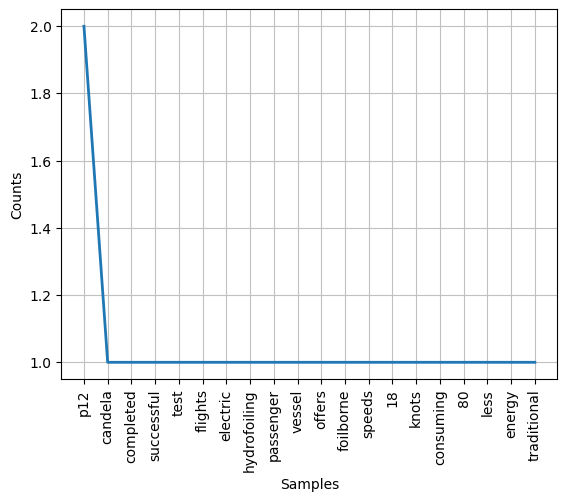

[('worlds', 1), ('first', 1), ('electric', 1), ('hydrofoiling', 1), ('passenger', 1), ('ferry', 1), ('production', 1)]


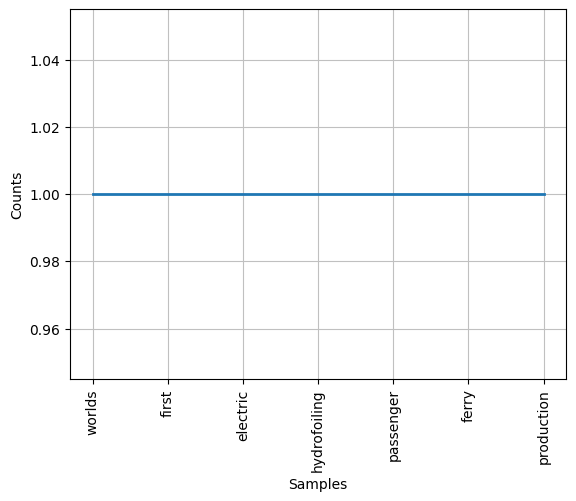

In [126]:
# Frequency Plot
fdist = nltk.FreqDist(tokensContent)
print(fdist.most_common(20))

fdist.plot(20,cumulative=False)
plt.show()

fdist = nltk.FreqDist(tokensTitle)
print(fdist.most_common(10))

fdist.plot(10,cumulative=False)
plt.show()

In [127]:
# Lemmatization
nltk.download('wordnet')
lem = nltk.WordNetLemmatizer()
news_df['content'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
news_df['title'][:10].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
print('Lemmatization')
print(news_df.head(10))

# to csv
news_df.to_csv('news.csv')

Lemmatization
                                               title    category  \
0  worlds first electric hydrofoiling passenger f...  Technology   
1  worldfirst system monitor seafood basket teste...  Technology   
2  tesla unveils nextgen humanoid robot 10 kg wei...  Technology   
3  meta used pirated books ai training despite wa...  Technology   
4             whatsapp allows pinning messages chats  Technology   
5  pm narendra modi announces plan launch ai mission  Technology   
6  51 indians believe ai enhance productivity wor...  Technology   
7  xs 2023 ad revenue fall 25 bn report firms pau...  Technology   
8                   indian embassy hosts seminar dpi  Technology   
9  foxconn invest additional 13911 crore karnatak...  Technology   

                                             content  
0  candela completed successful test flights p12 ...  
1  csiro australias national science agency devel...  
2  worlds richest man elon muskled tesla unveiled...  
3  meta trained a

[nltk_data] Downloading package wordnet to /Users/wing-/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
# Team frequency (TF)
tf1 = (news_df['content'][1:2]).apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,monitoring,2
1,system,2
2,water,2
3,quality,2
4,rivers,1


In [129]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
  try:
    tf1.loc[i, 'idf'] = np.log(news_df.shape[0]/(len(news_df[news_df['content'].str.contains(word)])))
  except:
    pass
tf1.head()

,words,tf,idf
0,monitoring,2,6.424058
1,system,2,3.663258
2,water,2,4.084659
3,quality,2,4.879159
4,rivers,1,5.762660


In [130]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()
print(tf1.head())

        words  tf       idf      tfidf
0  monitoring   2  6.424058  12.848117
1      system   2  3.663258   7.326515
2       water   2  4.084659   8.169319
3     quality   2  4.879159   9.758318
4      rivers   1  5.762660   5.762660


### WordCloud


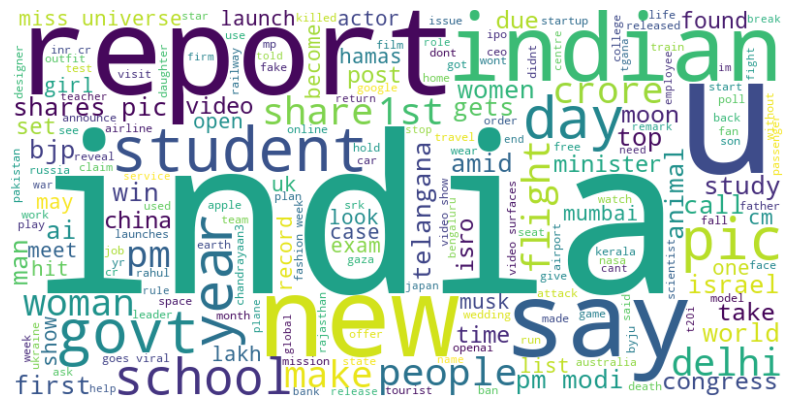

In [131]:
from wordcloud import WordCloud

# Concatenate all news articles into a single string
text = ' '.join(news_df['title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sampling data
Count the number of diffrent labels in dataset and plot a pie chart distribution.

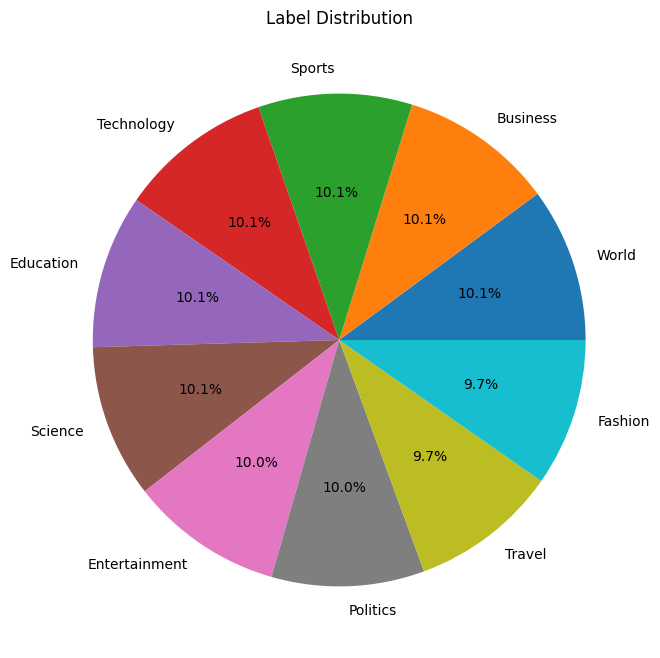

In [132]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each label
label_counts = news_df['category'].value_counts()

# Plot a pie chart of label distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

## Text Classification

Model Evaluation

In [133]:
# Split the data into training and test sets
training_corpus, test_corpus = train_test_split(news_df, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print("Training Corpus Size:", len(training_corpus))
print("Test Corpus Size:", len(test_corpus))


# Preparing data for SVM model (using the same training_corpus, test_corpus from 
# naive bayes example)
train_data = []
train_labels = []
for index, row in training_corpus.iterrows():
    train_data.append(row['title'])
    train_labels.append(row['category'])

test_data = []
test_labels = []
for index, row in test_corpus.iterrows():
    test_data.append(row['title'])
    test_labels.append(row['category'])

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8)

# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)

# Apply model on test data
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear
model = svm.SVC(kernel='linear')
model.fit(train_vectors, train_labels)
prediction = model.predict(test_vectors)
print(prediction)

# Additional testing with new data
extra_test_data = [
    "Australia name playing XI for first Test against Pakistan", #Sports
    "Actress Hilary Duff pregnant with her fourth baby, shares pic", #Entertainment
    "Elon Musk's Tesla recalls two million cars in US over Autopilot defect", #Technology
]

# Convert extra test data to feature vectors
extra_test_vectors = vectorizer.transform(extra_test_data)
# Make predictions on extra test data
extra_prediction = model.predict(extra_test_vectors)
print("Extra Test Prediction:", extra_prediction)

Training Corpus Size: 7891
Test Corpus Size: 1973
['Education' 'Business' 'Politics' ... 'Sports' 'Politics' 'Politics']
Extra Test Prediction: ['Sports' 'Entertainment' 'Technology']


In [134]:
print(classification_report(test_labels, prediction))

               precision    recall  f1-score   support

     Business       0.47      0.53      0.49       207
    Education       0.80      0.87      0.83       175
Entertainment       0.72      0.74      0.73       201
      Fashion       0.88      0.79      0.83       195
     Politics       0.85      0.86      0.85       218
      Science       0.84      0.81      0.82       190
       Sports       0.84      0.75      0.80       199
   Technology       0.47      0.48      0.48       204
       Travel       0.80      0.77      0.78       196
        World       0.64      0.65      0.65       188

     accuracy                           0.72      1973
    macro avg       0.73      0.72      0.73      1973
 weighted avg       0.73      0.72      0.72      1973



In [138]:
# show random news and not repeat
selected_news = set()  
def show_random_news(category):
    filtered_df = news_df[news_df['category'] == category]
    available_news = filtered_df[~filtered_df['title'].isin(selected_news)]  
    sample_size = min(5, len(available_news)) 
    random_news = available_news.sample(n=sample_size, replace=False)
    for index, news in random_news.iterrows():
        selected_news.add(news['title'])  
        print("Title:", news['title'])
        print("Category:", news['category'])
        print("Content:", news['content'])
        print("\n")

category = input("Enter a category: ")

show_random_news(category)

# Multinomial Naive Bayesian
Print the confusion matrix and heat map.

               precision    recall  f1-score   support

     Business       0.52      0.51      0.52       207
    Education       0.76      0.89      0.82       175
Entertainment       0.79      0.73      0.76       201
      Fashion       0.85      0.82      0.83       195
     Politics       0.84      0.87      0.85       218
      Science       0.79      0.82      0.80       190
       Sports       0.86      0.82      0.84       199
   Technology       0.45      0.42      0.43       204
       Travel       0.78      0.76      0.77       196
        World       0.65      0.67      0.66       188

     accuracy                           0.73      1973
    macro avg       0.73      0.73      0.73      1973
 weighted avg       0.73      0.73      0.73      1973

[4 0 4 ... 6 4 4]
['Politics' 'Business' 'Politics' ... 'Sports' 'Politics' 'Politics']


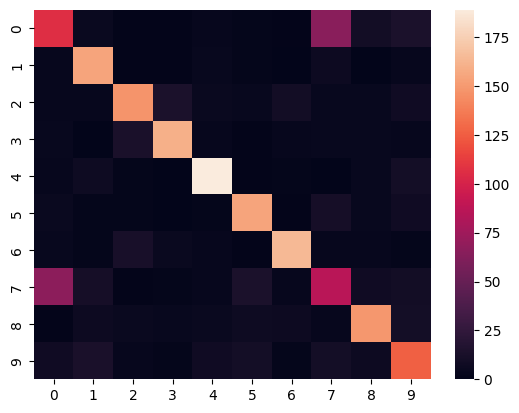

In [135]:
# Assuming you have a DataFrame 'news_df' with 'title' as features and 'category' as labels
X = news_df['title']
y = news_df['category']

# Convert the labels to numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convert the text content to numerical feature vectors
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

# Split the data into training and test sets
Xtr_count, Xte_count, Ytr, Yte = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(Xtr_count, Ytr)

# Make predictions with Naive Bayes
pred_nb = nb.predict(Xte_count)

# Print the classification report for Naive Bayes
print(classification_report(Yte, pred_nb, target_names=encoder.classes_))

# Plot the confusion matrix for Naive Bayes
sns.heatmap(confusion_matrix(Yte, pred_nb))

# Create feature vectors using TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=2, max_df=0.8)
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Split the data into training and test sets
Xtr_tfidf, Xte_tfidf, Ytr, Yte = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the SVM model
model = svm.SVC(kernel='linear')
model.fit(Xtr_tfidf, Ytr)

# Make predictions with SVM
pred_svm = model.predict(Xte_tfidf)
print(pred_svm)

# Convert numerical predictions back to original categories
pred_categories = encoder.inverse_transform(pred_svm)
print(pred_categories)
